<a href="https://colab.research.google.com/github/mikeobeid/CloudCourse/blob/main/ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6 - Cloud Computing
**Project:** AWS Skai-SingleStore Case Study

- **Firebase Database Link:** https://cloudcourse-23aba-default-rtdb.firebaseio.com/
- **Summary:**  
  This notebook scrapes the AWS case study page, indexes the 10 most important words based on frequency, saves them to a Firebase database, and displays the results in a bar chart.


In [ ]:
# Step 1: Install libraries
!pip install requests beautifulsoup4

# Step 2: Import libraries
import requests
from bs4 import BeautifulSoup

# Step 3: Define function to fetch page content
def fetch_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

# Step 4: Fetch the site you gave
url = 'https://aws.amazon.com/solutions/case-studies/skai-singlestore/'
soup = fetch_page(url)

# # Step 5: Print some text preview
# if soup:
#     print(soup.get_text()[:1000])  # Print only the first 1000 characters for preview
# else:
#     print("Failed to fetch the page.")



In [ ]:
# Step 6: Install libraries
!pip install nltk

In [4]:
# Step 7: Import more libraries
import re
import nltk
from nltk.stem import PorterStemmer

# Download NLTK stopwords
nltk.download('stopwords')

# Step 8: Define the index_words function
def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1
    return index

# Step 9: Define the remove_stop_words function
def remove_stop_words(index):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]
    return index

# Step 10: Define the apply_stemming function
def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count
    return stemmed_index

# Step 11: Build the full index (like in your lecture)
index = index_words(soup)
index = remove_stop_words(index)
index = apply_stemming(index)

# Step 12: Show top 10 words
sorted_index = sorted(index.items(), key=lambda x: x[1], reverse=True)
top_10 = sorted_index[:10]

# Step 13: Print top 10
print("Top 10 Words and their Counts:")
for word, count in top_10:
    print(f"{word}: {count}")


Top 10 Words and their Counts:
aw: 57
skai: 33
amazon: 25
data: 22
singlestor: 21
support: 14
profil: 14
improv: 13
time: 13
perform: 13


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 1: Install firebase-admin
!pip install firebase-admin

In [6]:
# Step 2: Import firebase libraries
import firebase_admin
from firebase_admin import credentials, db

# Step 3: Connect to Firebase (replace with your credentials file)
cred = credentials.Certificate('cloudcourse-23aba-firebase-adminsdk-fbsvc-b09987fbde.json')  # SON key here
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://cloudcourse-23aba-default-rtdb.firebaseio.com/'  # real database URL
})


In [7]:
# Step 4: Upload top 10 words to the database
ref = db.reference('/project_words_index')

for word, count in top_10:
    ref.child(word).set(count)

print("Top 10 words uploaded successfully to Firebase!")


Top 10 words uploaded successfully to Firebase!


In [8]:
# Step 5: Read the data back
ref = db.reference('/project_words_index')
words_data = ref.get()

# Step 6: Print words and their counts
print("Words from Firebase:")
for word, count in words_data.items():
    print(f"{word}: {count}")


Words from Firebase:
amazon: 25
aw: 57
data: 22
improv: 13
perform: 13
profil: 14
singlestor: 21
skai: 33
support: 14
time: 13


In [ ]:
# Step 7: Install matplotlib
!pip install matplotlib

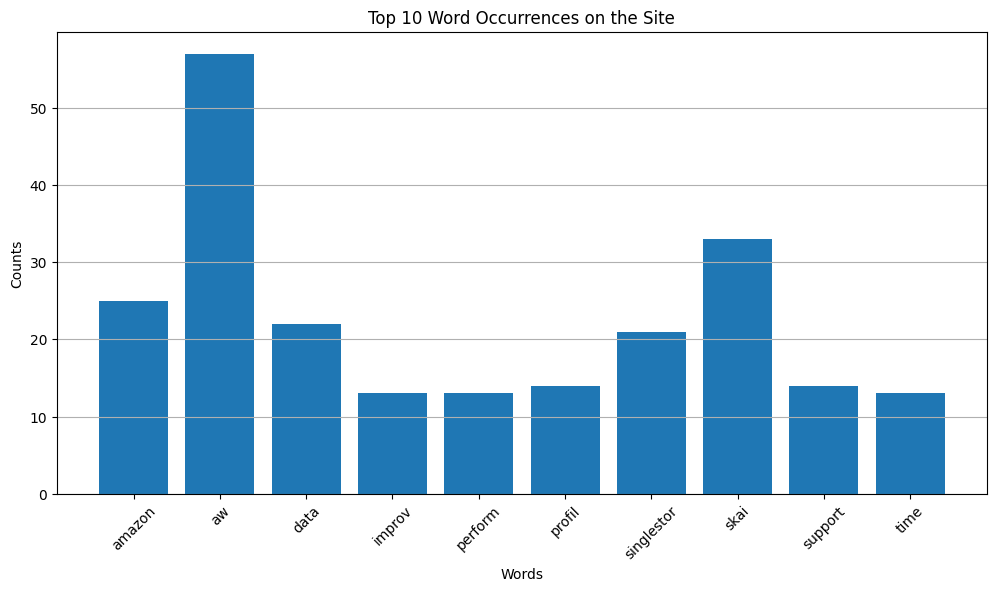

In [10]:
# Step 8: Import matplotlib
import matplotlib.pyplot as plt

# Step 9: Draw bar chart
words = list(words_data.keys())
counts = list(words_data.values())

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Word Occurrences on the Site')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
